In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Training data sets

In [2]:
trainangles_pdg = np.load('trainangles_t.npy', allow_pickle = True)
trainenergy_pdg = np.load('trainenergy_t.npy', allow_pickle = True)
trainbinfrac_pdg = np.load('trainbinfrac_t.npy', allow_pickle = True)
trainrsq_pdg = np.load('trainrsq_t.npy', allow_pickle = True)
pdg_pion_train = np.load('pdg_pion_train.npy')
traindedx = np.load('traindedx_t.npy', allow_pickle = True)

In [3]:
x_train = np.array(list(zip(trainangles_pdg, trainbinfrac_pdg, trainenergy_pdg, trainrsq_pdg, traindedx)))

In [4]:
len(x_train)

78513

In [5]:
y_train = pdg_pion_train

# Create and train BDT

In [6]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=100, random_state=0)
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100, random_state=0)

In [7]:
bdt.score(x_train, y_train)

0.943168647230395

In [8]:
bdt.classes_

array([  0, 211])

# Testing data sets

In [9]:
testangles = np.load('testangles_t.npy', allow_pickle = True)
testenergy = np.load('testenergy_t.npy', allow_pickle = True)
testbinfrac = np.load('testbinfrac_t.npy', allow_pickle = True)
testrsq = np.load('testrsq_t.npy', allow_pickle = True)
pdg_pion_test = np.load('pdg_pion_test.npy', allow_pickle = True)
testdedx = np.load('testdedx_t.npy', allow_pickle = True)

In [10]:
x_test = np.array(list(zip(testangles, testbinfrac, testenergy, testrsq, testdedx)))

In [11]:
len(x_test)

79124

In [12]:
y_test = pdg_pion_test

# Create and test BDT

In [13]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=100, random_state=0)
bdt.fit(x_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100, random_state=0)

In [14]:
bdt.score(x_test, y_test)

0.9361382134371367

In [15]:
set(y_train)

{0, 211}

# BDT training score

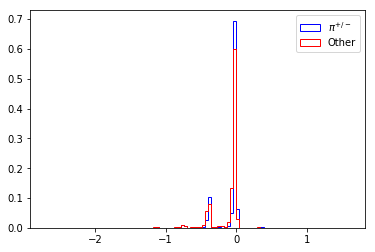

In [23]:
f_train = bdt.decision_function(x_train)
min_f_train = np.round(np.min(f_train), 1)
max_f_train = np.round(np.max(f_train), 1)
bins_train = np.linspace(min_f_train, max_f_train, 100)
cls_0_f_train = f_train[np.where(y_train == 0)]
cls_1_f_train = f_train[np.where(y_train == 211)]
weights_0 = np.ones_like(cls_0_f_train) / len(cls_0_f_train)
weights_1 = np.ones_like(cls_1_f_train) / len(cls_1_f_train)
plt.hist(cls_1_f_train, color='b', weights=weights_1, bins=bins_train, histtype='step', label=r'$\pi^{+/-}$')
plt.hist(cls_0_f_train, color='r', weights=weights_0, bins=bins_train, histtype='step', label='Other')
plt.legend()

In [17]:
pion_pred_train = bdt.predict(x_train)

In [18]:
len(pion_pred_train)

78513

In [19]:
np.save('pion_pred_train.npy', pion_pred_train)

# BDT testing score

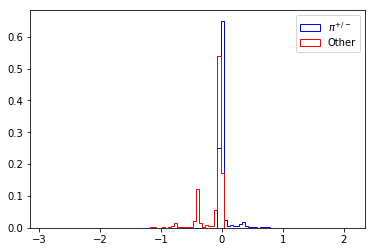

In [20]:
f_test = bdt.decision_function(x_test)
min_f_test = np.round(np.min(f_test), 1)
max_f_test = np.round(np.max(f_test), 1)
bins_test = np.linspace(min_f_test, max_f_test, 100)
cls_0_f_test = f_test[np.where(y_test == 0)]
cls_1_f_test = f_test[np.where(y_test == 211)]
weights_0 = np.ones_like(cls_0_f_test) / len(cls_0_f_test)
weights_1 = np.ones_like(cls_1_f_test) / len(cls_1_f_test)
plt.hist(cls_1_f_test, color='b', weights=weights_1, bins=bins_test, histtype='step', label=r'$\pi^{+/-}$')
plt.hist(cls_0_f_test, color='r', weights=weights_0, bins=bins_test, histtype='step', label='Other')
plt.legend()

In [21]:
pion_pred_test = bdt.predict(x_test)

In [22]:
np.save('pion_pred_test.npy', pion_pred_test)